# Imports

In [2]:
import itertools
import pickle

import pandas as pd
import tensorflow as tf
import missingno as msn
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression

# Loading training data

In [6]:
df = pd.read_csv("TrainingSet.csv")
df

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Has_Survived
0,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16208,15173,46,8795,DX6,58,21.723167,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
16209,24072,40,8029,DX6,10,20.791583,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
16210,701,14,572,DX6,10,27.820924,NO,URBAN,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0
16211,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


# Exploratory Data Analysis

<AxesSubplot:>

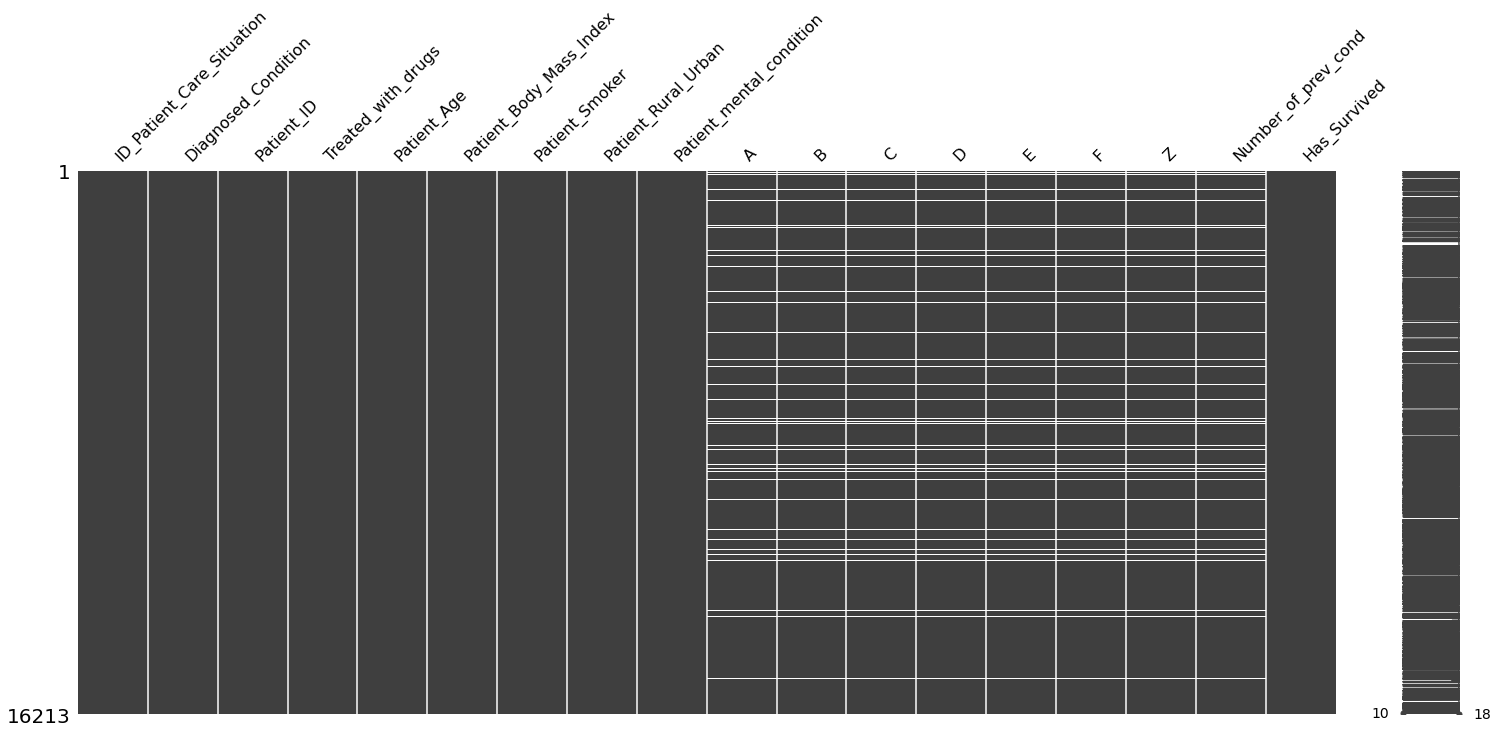

In [37]:
# Looking at nulls
msn.matrix(df)

In [11]:
# Deleting all null values
df.dropna(inplace=True)
df

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Has_Survived
0,18164,5,5740,16,36,22.945566,2,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,5339,51,12011,0,5,19.130976,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,5138,52,5296,24,53,19.103244,1,0,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,17265,9,5947,30,3,18.126976,1,1,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,24349,47,6585,28,62,25.074482,1,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16208,15173,46,8795,31,58,21.723167,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
16209,24072,40,8029,31,10,20.791583,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
16210,701,14,572,31,10,27.820924,1,1,0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0
16211,15503,41,2769,31,55,23.684585,1,0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [39]:
# Check the datatypes
df.dtypes

ID_Patient_Care_Situation      int64
Diagnosed_Condition            int64
Patient_ID                     int64
Treated_with_drugs            object
Patient_Age                    int64
Patient_Body_Mass_Index      float64
Patient_Smoker                object
Patient_Rural_Urban           object
Patient_mental_condition      object
A                            float64
B                            float64
C                            float64
D                            float64
E                            float64
F                            float64
Z                            float64
Number_of_prev_cond          float64
Has_Survived                   int64
dtype: object

<AxesSubplot:>

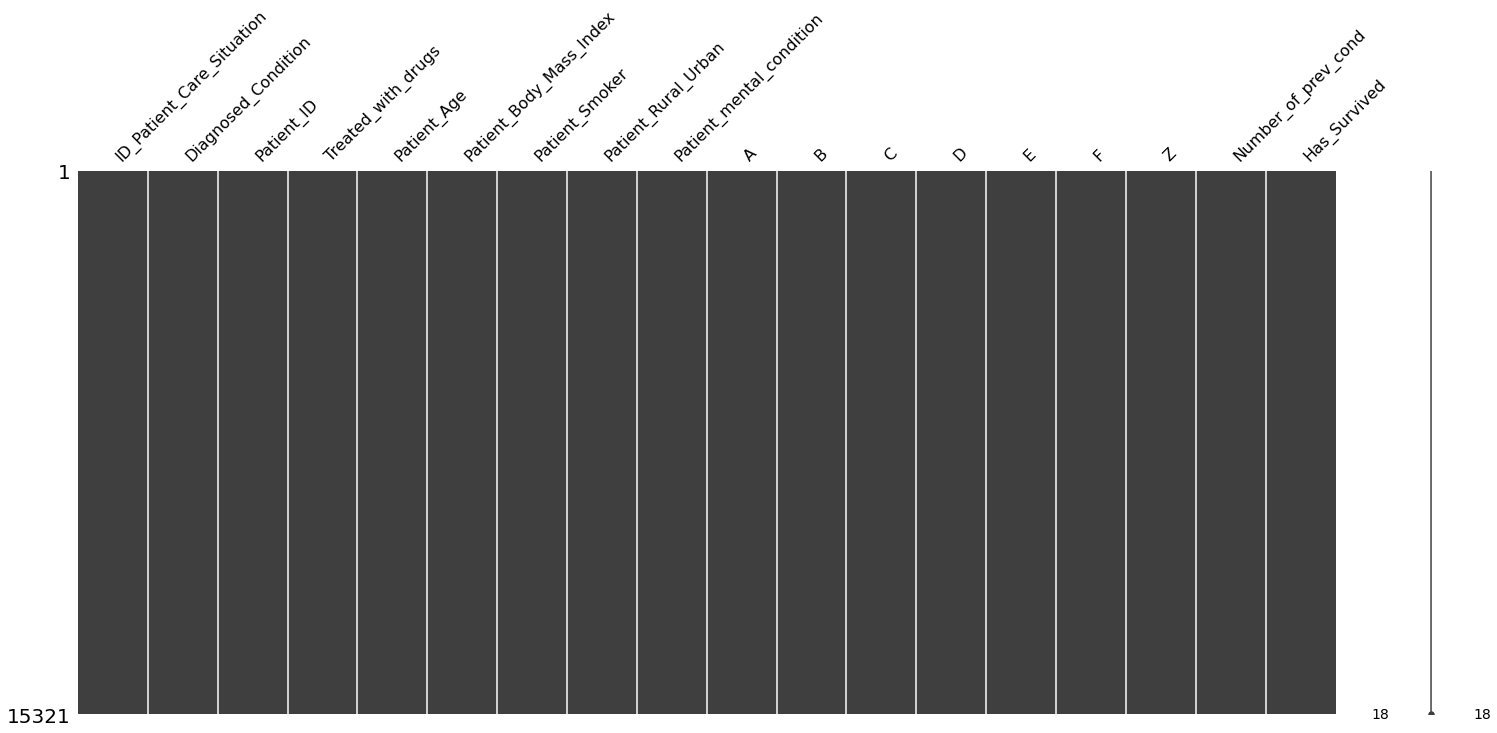

In [40]:
# Checking if all null values have been removed
msn.matrix(df)

## Testing if there are extra data that we don't need

In [41]:
df

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Has_Survived
0,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16208,15173,46,8795,DX6,58,21.723167,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
16209,24072,40,8029,DX6,10,20.791583,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
16210,701,14,572,DX6,10,27.820924,NO,URBAN,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0
16211,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [42]:
df["Diagnosed_Condition"].unique()

array([ 5, 51, 52,  9, 47, 17,  8, 35, 44, 37, 14, 12, 21, 43, 18, 45, 20,
        1, 23, 29, 16, 49, 13,  2, 38, 42,  3, 39, 46, 27, 19, 40, 26, 31,
       33, 50,  6, 11, 48, 10,  7, 41, 28, 30, 34,  4, 36, 15, 25, 32, 22,
       24])

In [43]:
df["Treated_with_drugs"].unique()

array(['DX2 ', 'DX1 ', 'DX3 ', 'DX5 ', 'DX4 ', 'DX6', 'DX2 DX5 ',
       'DX2 DX3 ', 'DX1 DX3 ', 'DX1 DX2 ', 'DX1 DX4 ', 'DX1 DX5 ',
       'DX2 DX4 DX5 ', 'DX1 DX2 DX3 ', 'DX3 DX5 ', 'DX3 DX4 DX5 ',
       'DX2 DX4 ', 'DX4 DX5 ', 'DX2 DX3 DX4 ', 'DX3 DX4 ', 'DX1 DX4 DX5 ',
       'DX1 DX2 DX4 ', 'DX1 DX3 DX5 ', 'DX1 DX3 DX4 ', 'DX1 DX2 DX3 DX4 ',
       'DX1 DX2 DX4 DX5 ', 'DX1 DX3 DX4 DX5 ', 'DX2 DX3 DX4 DX5 ',
       'DX1 DX2 DX5 ', 'DX2 DX3 DX5 ', 'DX1 DX2 DX3 DX5 ',
       'DX1 DX2 DX3 DX4 DX5 '], dtype=object)

In [44]:
df["Patient_Smoker"].unique()

array(['YES', 'NO'], dtype=object)

In [45]:
df["Patient_Rural_Urban"].unique()

array(['RURAL', 'URBAN'], dtype=object)

In [46]:
df["Patient_mental_condition"].unique()

array(['Stable'], dtype=object)

In [47]:
df["Has_Survived"].unique()

array([1, 0])

## Looking at Statistical description of the data

In [48]:
# Description of ages of patients
df["Patient_Age"].describe()

count    15321.000000
mean        33.132694
std         19.463498
min          0.000000
25%         16.000000
50%         33.000000
75%         50.000000
max         66.000000
Name: Patient_Age, dtype: float64

In [49]:
# min and max of Diagnosed_Condition
df["Diagnosed_Condition"].min(), df["Diagnosed_Condition"].max()

(1, 52)

In [50]:
# Checking for duplicates
count_unique = 0 
count_all = 0
for i in df["ID_Patient_Care_Situation"].unique():
    count_unique += 1
for i in df["ID_Patient_Care_Situation"]:
    count_all += 1
print(count_all, count_unique)
print(count_unique == count_all)

15321 15321
True


In [51]:
# Looking whether there are diagnosis with condition of 0
df[df["Diagnosed_Condition"] == 0]

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Has_Survived


### Check for sanity of Number_of_prev_cond

want to check if the sum of conditions of a patient corresponds to df["Number_of_prev_cond"]

In [52]:
count = 0
for i in(df["A"] + df["B"] + df["C"] + df["D"] + df["E"] + df["F"] + df["Z"]) == df["Number_of_prev_cond"]:
    if i is False:
        count += 1
print(count)

0


# Label Encoding for non-numerical values

In [53]:
df

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Has_Survived
0,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,5138,52,5296,DX3,53,19.103244,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,17265,9,5947,DX5,3,18.126976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,24349,47,6585,DX4,62,25.074482,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16208,15173,46,8795,DX6,58,21.723167,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
16209,24072,40,8029,DX6,10,20.791583,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
16210,701,14,572,DX6,10,27.820924,NO,URBAN,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,0
16211,15503,41,2769,DX6,55,23.684585,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1


In [54]:
le = preprocessing.LabelEncoder()
Treated_with_drugs = le.fit_transform(list(df["Treated_with_drugs"]))
Patient_Smoker = le.fit_transform(list(df["Patient_Smoker"]))
Patient_Rural_Urban = le.fit_transform(list(df["Patient_Rural_Urban"]))
Patient_mental_condition = le.fit_transform(list(df["Patient_mental_condition"]))

## Creating Features and Labels

In [55]:
# Creating our features
X = list(zip(df["Diagnosed_Condition"],Treated_with_drugs,df["Patient_Age"], df["Patient_Body_Mass_Index"], Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,df["A"],df["B"], df["C"], df["D"], df["E"], df["F"], df["Z"], df["Number_of_prev_cond"]))
# Creating our labels
y = df["Has_Survived"]

### Splitting our Training data in X_train,X_test, y_train,y_test for training purposes

In [56]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.1, random_state=0)

## Finally training creating and training our model

In [57]:
# Creating and training our model
model = DecisionTreeClassifier(random_state=0)

model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

### Predicting using our model

In [58]:
# Predicting our results on X_train_test
prediction = model.predict(X_test)

In [59]:
# Comparing our predictions to actual data
for i in range(len(prediction)):
    print(f"Actual: {list(y_test)[i]} | Predicted: {list(prediction)[i]}")

Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 0
Actual: 0 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 1


In [60]:
# Counting how many wrong predictions we have

count_true = 0 
count_false = 0 
for i in range(len(prediction)):
    if prediction[i] == list(y_test)[i] :
        count_true += 1
    else:
        count_false += 1
print(count_true , "|", count_false)

1180 | 353


In [61]:
# Looking at the score of the model
model.score(X_test, y_test)

0.7697325505544683

## Predicting using the Logistic Regression model

In [63]:
# Predicting on X_test
prediction = model.predict(X_test)

In [64]:
# Looking at the score
model.score(X_test, y_test)

0.6862361382909328

In [65]:
# Looking at how many wrong predictions we have
count_true = 0 
count_false = 0 
for i in range(len(prediction)):
    if prediction[i] == list(y_test)[i] :
        count_true += 1
    else:
        count_false += 1
print(count_true , "|", count_false)

1052 | 481


# Trying to get the best combination of features for our model

Going to use the itertools module to create different combinations of features to have a better accuracy

In [68]:
#importing and cleaning the data 
file = pd.read_csv("TrainingSet.csv")
file.dropna(inplace=True)

# creating list of all available features 
all_features = ['Diagnosed_Condition','Treated_with_drugs','Patient_Age','Patient_Body_Mass_Index','Patient_Smoker','Patient_Rural_Urban','Patient_mental_condition','A','B',
'C','D','E','F','Z','Number_of_prev_cond']

# Encoding our non-numerical data
le = preprocessing.LabelEncoder()
file['Treated_with_drugs'] = le.fit_transform(list(file['Treated_with_drugs']))
file['Patient_Smoker'] = le.fit_transform(list(file['Patient_Smoker']))
file['Patient_Rural_Urban'] = le.fit_transform(list(file['Patient_Rural_Urban']))
file['Patient_mental_condition'] = le.fit_transform(list(file['Patient_mental_condition']))

# Combining features into unique pairs 
lst = []
def combine2(lst, n):
    return [list(x) for x in itertools.combinations(lst, n)]

for i in range(1,10):
    frst = combine2(all_features,i)
    lst = lst + frst

# Creating model with unique combination of features 
result = 0
acc = 0
for feature_comb  in lst :
    # getting data from file table 
         
    X = file[feature_comb]
    y = file['Has_Survived']
    
    # spliting values for model training/testing 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size= 0.1)

    # Creating and fitting the model 
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train , y_train)
    
    # Predicting values on X_test
    prediction = model.predict(X_test)

    # Evaluating a model 
    count_true = 0 
    count_false = 0 
    for i in range(len(prediction)):
        if prediction[i] == list(y_test)[i] :
            count_true += 1
        else:
            count_false += 1

    # Iteration accuracy result 
    result_iter = 1 - (count_false /(count_true + count_false))
    accuracy = model.score(X_test, y_test)

    if acc < accuracy:
        acc = accuracy
        print(acc)
    
    if result_iter > result :
        result = result_iter
        best_feat = feature_comb
        print(f'the resut accuracy is {result}')
        print(best_feat)

0.680365296803653
the resut accuracy is 0.680365296803653
['Diagnosed_Condition']
0.6894977168949772
the resut accuracy is 0.6894977168949772
['Treated_with_drugs']
0.6986301369863014
the resut accuracy is 0.6986301369863014
['Diagnosed_Condition', 'Patient_Smoker']
0.7012393998695369
the resut accuracy is 0.7012393998695369
['Treated_with_drugs', 'Patient_Smoker']
0.7064579256360078
the resut accuracy is 0.7064579256360078
['Treated_with_drugs', 'A']
0.7332028701891715
the resut accuracy is 0.7332028701891715
['Diagnosed_Condition', 'Treated_with_drugs', 'Patient_Smoker']
0.7377690802348337
the resut accuracy is 0.7377690802348337
['Diagnosed_Condition', 'Treated_with_drugs', 'Patient_Smoker', 'D']
0.7521200260926288
the resut accuracy is 0.7521200260926288
['Diagnosed_Condition', 'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker']
0.7625570776255708
the resut accuracy is 0.7625570776255708
['Diagnosed_Condition', 'Treated_with_drugs', 'Patient_Age', 'Pat

In [69]:
# Continuing with 10,11 and 12 combinations

# creating list of all available features 
all_features = ['Diagnosed_Condition','Treated_with_drugs','Patient_Age','Patient_Body_Mass_Index','Patient_Smoker','Patient_Rural_Urban','Patient_mental_condition','A','B',
'C','D','E','F','Z','Number_of_prev_cond']

# Encoding our non-numerical data
le = preprocessing.LabelEncoder()
df['Treated_with_drugs'] = le.fit_transform(list(df['Treated_with_drugs']))
df['Patient_Smoker'] = le.fit_transform(list(df['Patient_Smoker']))
df['Patient_Rural_Urban'] = le.fit_transform(list(df['Patient_Rural_Urban']))
df['Patient_mental_condition'] = le.fit_transform(list(df['Patient_mental_condition']))

# Combining features into unique pairs 
lst = []
def combine2(lst, n):
    return [list(x) for x in itertools.combinations(lst, n)]

for i in range(10,13):
    frst = combine2(all_features,i)
    lst = lst + frst

# Creating model with unique combination of features 
result = 0
acc = 0
for feature_comb  in lst :
    # getting data from file table 
         
    X = file[feature_comb]
    y = file['Has_Survived']
    
    # spliting values for model training/testing 
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, test_size= 0.1)

    # Creating and fitting the model 
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train , y_train)
    
    # Predicting values on X_test
    prediction = model.predict(X_test)

    # Evaluating a model 
    count_true = 0 
    count_false = 0 
    for i in range(len(prediction)):
        if prediction[i] == list(y_test)[i] :
            count_true += 1
        else:
            count_false += 1

    # Iteration accuracy result 
    result_iter = 1 - (count_false /(count_true + count_false))
    accuracy = model.score(X_test, y_test)

    if acc < accuracy:
        acc = accuracy
        print(acc)
    
    if result_iter > result :
        result = result_iter
        best_feat = feature_comb
        print(f'the resut accuracy is {result}')
        print(best_feat)

0.7586431833007176
the resut accuracy is 0.7586431833007176
['Diagnosed_Condition', 'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition', 'A', 'B', 'C']
0.7782126549249837
the resut accuracy is 0.7782126549249837
['Diagnosed_Condition', 'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition', 'A', 'B', 'D']
0.7788649706457925
the resut accuracy is 0.7788649706457926
['Diagnosed_Condition', 'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition', 'B', 'D', 'Number_of_prev_cond']
0.7932159165035877
the resut accuracy is 0.7932159165035877
['Diagnosed_Condition', 'Treated_with_drugs', 'Patient_Age', 'Patient_Body_Mass_Index', 'Patient_Smoker', 'Patient_Rural_Urban', 'Patient_mental_condition', 'D', 'F', 'Number_of_prev_cond']


# Trying to use the find features to predict X_test using LogisticRegression

In [ ]:
# Creating new X from the best combination of features
X = list(zip(df['Diagnosed_Condition'], df['Treated_with_drugs'], df['Patient_Age'], df['Patient_Body_Mass_Index'], df['Patient_Smoker'], df['Patient_Rural_Urban'], df['Patient_mental_condition'], df['D'], df['F'], 'Number_of_prev_cond']))
y = df["Has_Survived"]

# Splitting our data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

### Creating a model, training it, and evaluating

In [ ]:
# Creating a model
model = LogisticRegression()

# Training the model
model.fit(X_train, y_train)

# Evaluating the model
count_true = 0
count_false = 0
for i in range(len(prediction)):
    if prediction[i] == list(y_test)[i] :
        count_true += 1
    else:
        count_false += 1

    print(f"Actual: {list(y_test)[i]} | Predicted: {list(prediction)[i]}")

# Calculating the accuracy of the model
result_iter = 1 - (count_false /(count_true + count_false))
accuracy = model.score(X_test, y_test)

print(result)
print(accuracy)


/Users/andriievskyi/tensorflow-test/env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Actual: 1 | Predicted: 1.0
Actual: 1 | Predicted: 0.0
Actual: 1 | Predicted: 1.0
Actual: 1 | Predicted: 0.0
Actual: 0 | Predicted: 0.0
Actual: 1 | Predicted: 1.0
Actual: 1 | Predicted: 0.0
Actual: 1 | Predicted: 0.0
Actual: 1 | Predicted: 1.0
Actual: 1 | Predicted: 1.0
Actual: 0 | Predicted: 0.0
Actual: 0 | Predicted: 0.0
Actual: 1 | Predicted: 1.0
Actual: 1 | Predicted: 0.0
Actual: 1 | Predicted: 1.0
Actual: 0 | Predicted: 0.0
Actual: 0 | Predicted: 1.0
Actual: 0 | Predicted: 1.0
Actual: 1 | Predicted: 0.0
Actual: 1 | Predicted: 0.0
Actual: 0 | Predicted: 0.0
Actual: 0 | Predicted: 0.0
Actual: 0 | Predicted: 0.0
Actual: 1 | Predicted: 1.0
Actual: 1 | Predicted: 1.0
Actual: 1 | Predicted: 1.0
Actual: 1 | Predicted: 1.0
Actual: 0 | Predicted: 0.0
Actual: 1 | Predicted: 1.0
Actual: 0 | Predicted: 0.0
Actual: 1 | Predicted: 1.0
Actual: 1 | Predicted: 1.0
Actual: 1 | Predicted: 1.0
Actual: 0 | Predicted: 0.0
Actual: 1 | Predicted: 1.0
Actual: 0 | Predicted: 1.0
Actual: 1 | Predicted: 0.0
A

# Buidling a Binary Classification Neural Network

I then used Google Colab to run the Neural Networks faster (I included only the version of the best model)

In [ ]:
# Creating features and labels using the best combinaton of features
X = list(zip(df['Diagnosed_Condition'], df['Treated_with_drugs'], df['Patient_Age'], df['Patient_Body_Mass_Index'], df['Patient_Smoker'], df['Patient_Rural_Urban'], df['B'], df['D'], df['Number_of_prev_cond']))
y = df["Has_Survived"]

# Splitting the data into training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)
X_train = pd.DataFrame(X_train)

# Creating a model with 3 layers
model = tf.keras.Sequential([  
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(60,input_dim = 9, activation="relu"),
  tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compiling the model
model.compile(
  loss = "binary_crossentropy",
  optimizer = tf.keras.optimizers.Adam(lr=0.01),
  metrics = ["accuracy"]
)

# Fitting the model
model.fit(X_train, y_train, epochs=400, batch_size=32)

NameError: name 'df' is not defined

### Predicting using our Neural Network and Evaluating it

In [ ]:
# Creating predictions
prediction = model.predict(X_test).round()

# Evaluating the results
model.evaluate(pd.DataFrame(X_test), pd.DataFrame(y_test))

## Playing around with different hyperparameters in DecisionTreeClassifier

Creating a function that will choose best pair of max_depth and min_samples_leaf for each criterion

In [7]:
def bestAccuracy(X_train, X_test, y_train, y_test):
    best_acc_gini = 0
    best_acc_entropy = 0
    m_depth_gini = 0 
    min_s_leaf_gini = 0
    m_depth_entropy = 0
    min_s_leaf_entropy = 0

    # Training with criterion="gini"
    for i in range(1,15):
        for j in range(1,15):
            model = DecisionTreeClassifier(random_state=42, criterion="gini", max_depth=i, min_samples_leaf=j)
            model.fit(X_train , y_train)
            acc = model.score(X_test, y_test)

        # Recording the best scores and parameters for the best score
        if acc > best_acc_gini:
            best_acc_gini = acc
            m_depth_gini = i
            min_s_leaf_gini = j

    # Training with criterion="entropy"
    for i in range(1,15):
        for j in range(1,15):
            model = DecisionTreeClassifier(random_state=42, criterion="entropy", max_depth=i, min_samples_leaf=j)
            model.fit(X_train , y_train)
            acc = model.score(X_test, y_test)

        # Recording the best scores and parameters for the best score
        if acc > best_acc_entropy:
            best_acc_entropy = acc
            m_depth_entropy = i
            min_s_leaf_entropy = j

    # Comparing "gini" with "entropy" and returning the best set of parameters
    if best_acc_entropy > best_acc_gini:
        print(f"Entropy is better with an accuracy of: {best_acc_entropy}")
        return "entropy", m_depth_entropy,min_s_leaf_entropy
    else:
        print(f"Gini is better with an accuracy of {best_acc_gini}")
        return "gini", m_depth_gini, min_s_leaf_gini
                      

## Using the function above to create create a model with the best accuracy

In [12]:
# Creating labels with the best combination of features that was figured out using itertools
X = list(zip(df['Diagnosed_Condition'], df['Treated_with_drugs'], df['Patient_Age'], df['Patient_Body_Mass_Index'], df['Patient_Smoker'], df['Patient_Rural_Urban'], df['Patient_mental_condition'], df['D'], df['F'], df['Number_of_prev_cond']))
y = df["Has_Survived"]

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

# Getting the best parameters 
params = bestAccuracy(X_train, X_test, y_train, y_test) 

# Creating and fitting the model 
model = DecisionTreeClassifier(random_state=42, criterion=params[0], max_depth=params[1], min_samples_leaf=params[2])
model.fit(X_train , y_train)


# Predicting values on X_test
prediction = model.predict(X_test)

Gini is better with an accuracy of 0.8193085453359426


## Saving the model

In [20]:
pickle.dump(model,open('best_model.pickle','wb'))

In [138]:
# Printing our predictions
for i in range(len(prediction)):
    print(f"Actual: {list(y_test)[i]} | Predicted: {list(prediction)[i]}")

Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 1 | Predicted: 1
Actual: 0 | Predicted: 0
Actual: 0 | Predicted: 0


In [139]:
# Counting how many wrong predictions we have

count_true = 0 
count_false = 0 
for i in range(len(prediction)):
    if prediction[i] == list(y_test)[i] :
        count_true += 1
    else:
        count_false += 1
print(count_true , "|", count_false)

1262 | 271


### Counting the precision score for our training_testing data

In [141]:
precision_score(y_test, prediction)

0.8591248665955176

# Importing Testing data

In [168]:
test_df = pd.read_csv("TestingSet.csv")
answers = pd.read_csv("Tran.csv")

# Adding Has_Survived column to testing data
test_df["Has_Survived"] = answers

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Has_Survived
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
2,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1
3,10808,45,7977,DX6,47,26.155120,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
4,23133,15,4975,DX6,26,23.968051,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6879,26113,49,3243,DX5,4,22.845678,NO,URBAN,Stable,1.0,0.0,0.0,1.0,1.0,0.0,0.0,3.0,1
6880,27360,25,9522,DX6,31,24.094697,YES,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
6881,15613,3,1548,DX2 DX4,14,18.643448,NO,RURAL,Stable,1.0,1.0,0.0,1.0,1.0,1.0,0.0,5.0,0
6882,31646,11,5764,DX3,25,23.719125,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


## Cleaning the data

In [177]:
test_df.dropna(inplace=True)
le = preprocessing.LabelEncoder()
test_df['Treated_with_drugs'] = le.fit_transform(list(test_df['Treated_with_drugs']))
test_df['Patient_Smoker'] = le.fit_transform(list(test_df['Patient_Smoker']))
test_df['Patient_Rural_Urban'] = le.fit_transform(list(test_df['Patient_Rural_Urban']))
test_df['Patient_mental_condition'] = le.fit_transform(list(test_df['Patient_mental_condition']))

# Creating X_test and y_test from the best

In [178]:
X_test = list(zip(test_df['Diagnosed_Condition'], test_df['Treated_with_drugs'], test_df['Patient_Age'], test_df['Patient_Body_Mass_Index'], test_df['Patient_Smoker'], test_df['Patient_Rural_Urban'], test_df['Patient_mental_condition'], test_df['D'], test_df['F'], test_df['Number_of_prev_cond']))
y_test = list(test_df["Has_Survived"])

### Making predictions on the testing data

In [22]:
model = DecisionTreeClassifier(random_state=42, criterion=params[0], max_depth=params[1], min_samples_leaf=params[2])
model.fit(X_test , y_test)
prediction = model.predict(list(X_test), list(y_test))

# Saving the results to csv

In [ ]:
pd.DataFrame(prediction).to_csv("predictons.csv")